# Setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import scipy
from sklearn.neighbors import NearestNeighbors # importing the library
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
earth_density    = 5.51   # [g/cm**3]

In [2]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")

In [3]:
# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))
period_EA            = dataEA.pl_orbper          # [days]
radius_EA            = dataEA.pl_rade            # [Earth Radius]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.

mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature

# Filter Planets

In [4]:
def filter_planets(planet_name_list,rel_unc_mass_criteria,rel_unc_density_criteria):
    EA_planets = []
    for i in range(0,len(planet_name_list)):
        if radius_EA[i]<4 and isinstance(st_spectype_EA[i],str) and "M" in st_spectype_EA[i]:
            relative_uncertainty_mass    = (mass_unc_up_EA[i] - mass_unc_low_EA[i]) / (2 * mass_EA[i])
            relative_uncertainty_density = (density_unc_up_EA[i] - density_unc_low_EA[i]) / (2 * density_EA[i])
            if relative_uncertainty_mass < rel_unc_mass_criteria and relative_uncertainty_density < rel_unc_density_criteria:
                EA_planets.append(planet_name_list[i])
    if rel_unc_mass_criteria > 0.06 and rel_unc_density_criteria > 0.06:
    #### Adding the TRAPPIST-1 planets  ##### (biggest rel_err around 6%)
        EA_add_index = [5209,5210,5211,5212,5213,5214,5215] # adding the Trappist Planets
        for i in EA_add_index:
            EA_planets.append(planet_name_EA[i])
    return EA_planets

In [9]:
def make_lists(EA_planets):
    planet      = [];planet_i       = []; 
    radius      = []; radius_up     = []; radius_low  = []
    mass        = [];  mass_up      = []; mass_low    = []
    density     = []; density_up    = []; density_low = []

    for i in range(0,len(EA_planets)):
        index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
        radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
        density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
        mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low

def find_planet_index(name):
    return (list(EA_planets).index(name))


### Want to find a planet in the list?

In [6]:
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)

def find_planet_index_EA(name):
    return (list(planet_name_EA).index(name))

name_find  = 'GJ 367 b'
index_mark = find_planet_index_EA(name_find)
relative_uncertainty_mass    = (mass_unc_up_EA[index_mark] - mass_unc_low_EA[index_mark]) / (2 * mass_EA[index_mark])
relative_uncertainty_density = (density_unc_up_EA[index_mark] - density_unc_low_EA[index_mark]) / (2 * density_EA[index_mark])

#print(name_find,index_mark,list(st_spectype_EA)[index_mark])
#print(relative_uncertainty_mass,relative_uncertainty_density)
#print(density_EA[index_mark])

### Plot selected planets

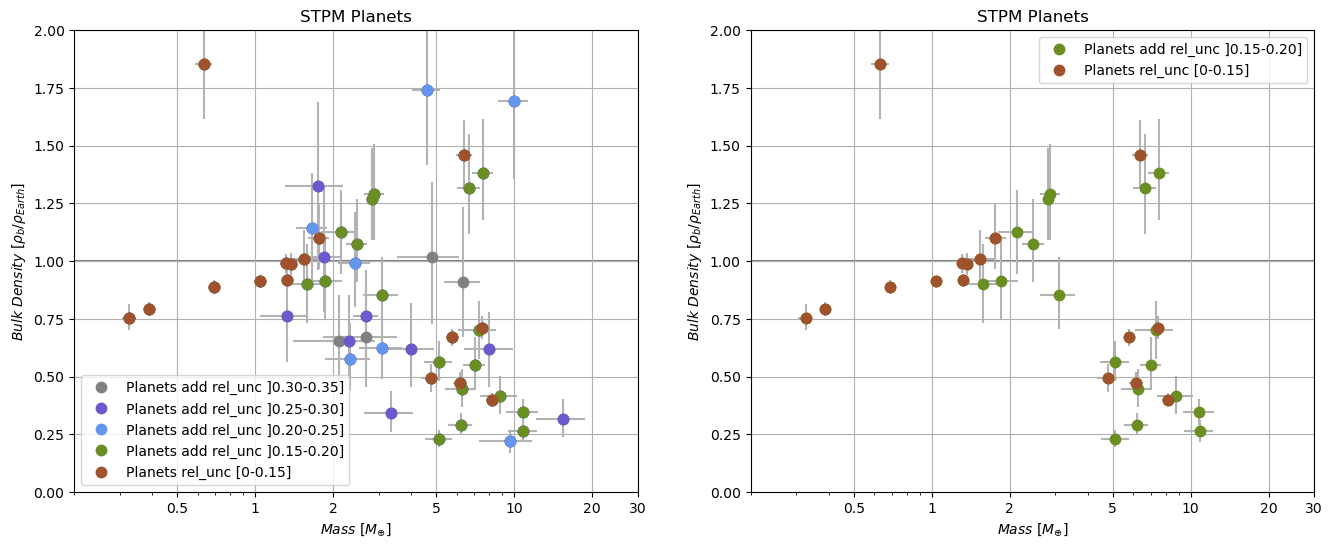

In [10]:
plt.figure(figsize=(16, 6))
markersize = 15
plt.subplot(1, 2, 1)
EA_planets = filter_planets(planet_name_EA,0.35,0.35)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.30-0.35]",color = "grey",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.25-0.30]",color = "slateblue",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.25,0.25)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.20-0.25]",color = "cornflowerblue",markersize = markersize)


EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.15,0.15)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets rel_unc [0-0.15]",color = "Sienna",markersize = markersize)

# Formatting
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("STPM Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); leg = plt.legend(); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

plt.subplot(1, 2, 2)

EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)
mass_err   = [np.abs(mass_low),mass_up]; density_err = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-18)
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets add rel_unc ]0.15-0.20]",color = "olivedrab",markersize = markersize)

EA_planets = filter_planets(planet_name_EA,0.15,0.15)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err   = [np.abs(mass_low),mass_up]; density_err = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
plt.plot(mass,np.divide(density,earth_density),".",label = "Planets rel_unc [0-0.15]",color = "Sienna",markersize = markersize)
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.title("STPM Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); leg = plt.legend(); plt.hlines(1,0,30,"grey",zorder = -30); plt.grid()

Marked planet:TRAPPIST-1 d has mass: 0.388 and denstiy: 4.366784
Find planet:TRAPPIST-1 d has mass: 0.388 and denstiy: 4.366784
Find planet:TRAPPIST-1 e has mass: 0.692 and denstiy: 4.901605
Find planet:TRAPPIST-1 h has mass: 0.326 and denstiy: 4.16278


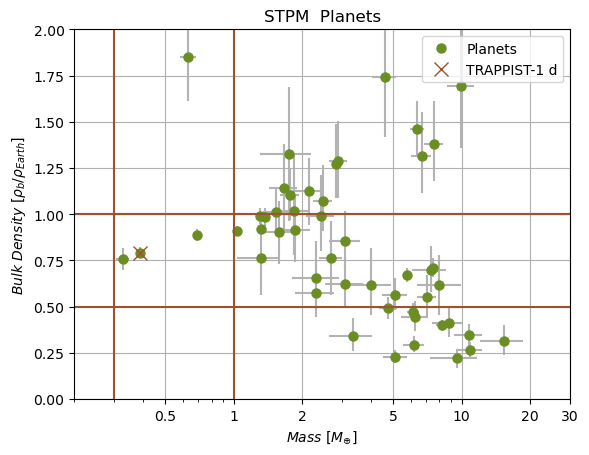

In [11]:
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]

plt.plot(mass,np.divide(density,earth_density),".",label = "Planets",color = "olivedrab",markersize = 13)
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)

#### Want to find a specific planet? #####
name_find  = "TRAPPIST-1 d"
if isinstance(name_find,str):
    index_mark = find_planet_index(name_find)
    plt.plot(mass[index_mark],np.divide(density[index_mark],earth_density),"x",color = "sienna",label = name_find,markersize = 10
)
    print("Marked planet:" + name_find + " has mass: " + str(mass[index_mark]) + " and denstiy: " + str(density[index_mark]))

#### What planets are in this area ####
find_planets_in_range = True
mass_range    = [0.3,1]
density_range = [0.5,1]  # in density/earth bulk density

if find_planets_in_range == True:
    plt.hlines(density_range[0],0,30,"sienna",zorder = 2)
    plt.hlines(density_range[1],0,30,"sienna",zorder = 2)
    plt.vlines(mass_range[0],0,2,"sienna")
    plt.vlines(mass_range[1],0,2,"sienna")
    for i in range(0,len(mass)):
        if mass_range[0] < mass[i] < mass_range[1] and density_range[0] < np.divide(density[i],earth_density) < density_range[1]:
            print("Find planet:" + planet[i] + " has mass: " + str(mass[i]) + " and denstiy: " + str(density[i]))

plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log"); plt.legend()
plt.title("STPM  Planets"); plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
leg = plt.legend(); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30)

# Algorithm

In [12]:
EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets)                                                                                                           
X = np.transpose([np.log10(mass),np.divide(density,earth_density)])
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
# plt.plot(distances) # plotting the distances


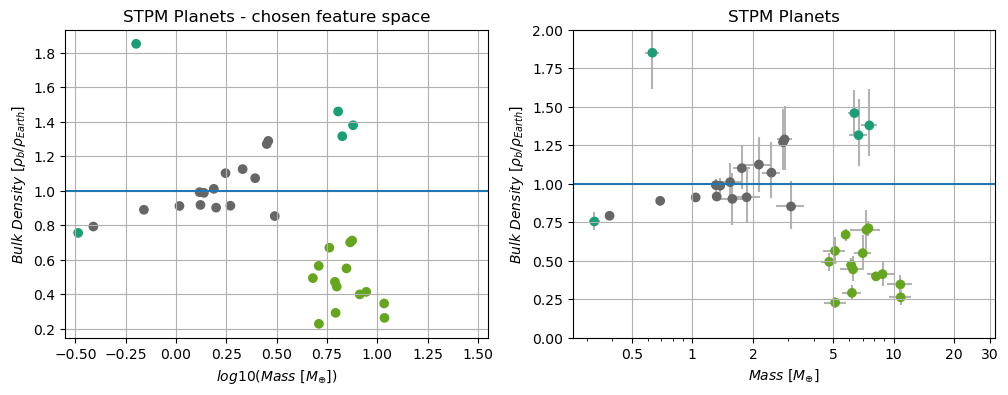

In [13]:
EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets) 
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
X = np.transpose([np.log10(mass),np.divide(density,earth_density)])
dbscan = DBSCAN(eps = 0.3, min_samples =5).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "Dark2",alpha=1) # plotting the clusters

plt.xlabel("$log10(Mass\ [M_{\oplus}])$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); 
plt.title("STPM Planets - chosen feature space"); plt.grid(); plt.hlines(1,-0.55,1.55); plt.xlim(-0.55,1.55);

plt.subplot(1, 2, 2)
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
X = np.transpose([mass,np.divide(density,earth_density)])
plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "Dark2") # plotting the clusters

plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}] $"); plt.xscale("log"); plt.title("STPM Planets")
plt.ylim(0,2); plt.xlim(0,32); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.hlines(1,0,32)
plt.grid(); plt.show()

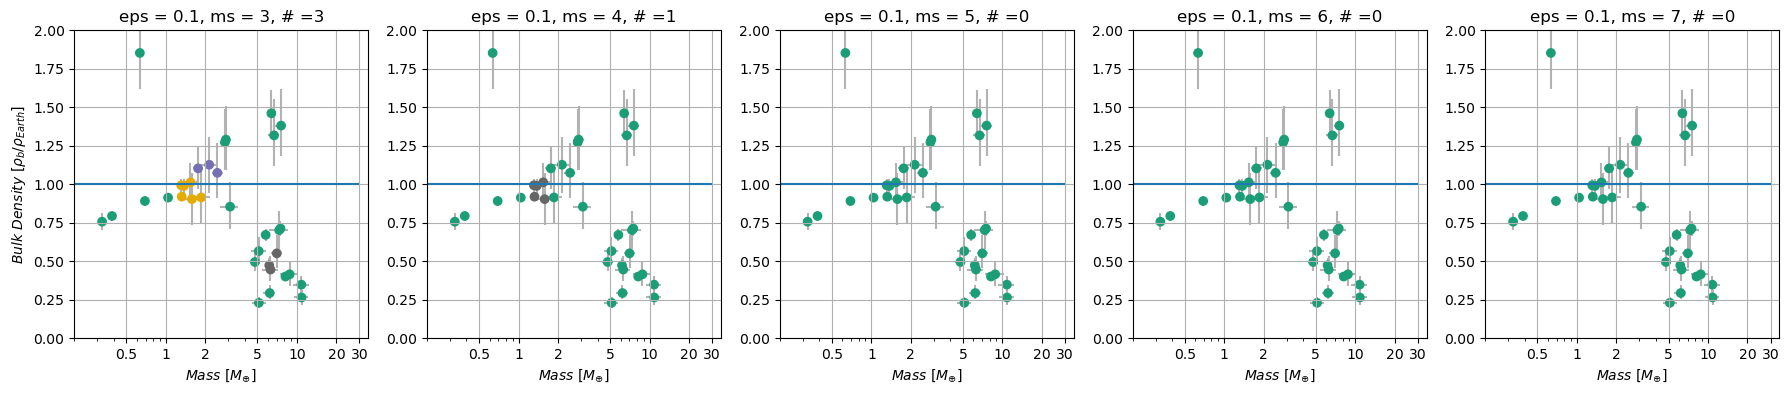

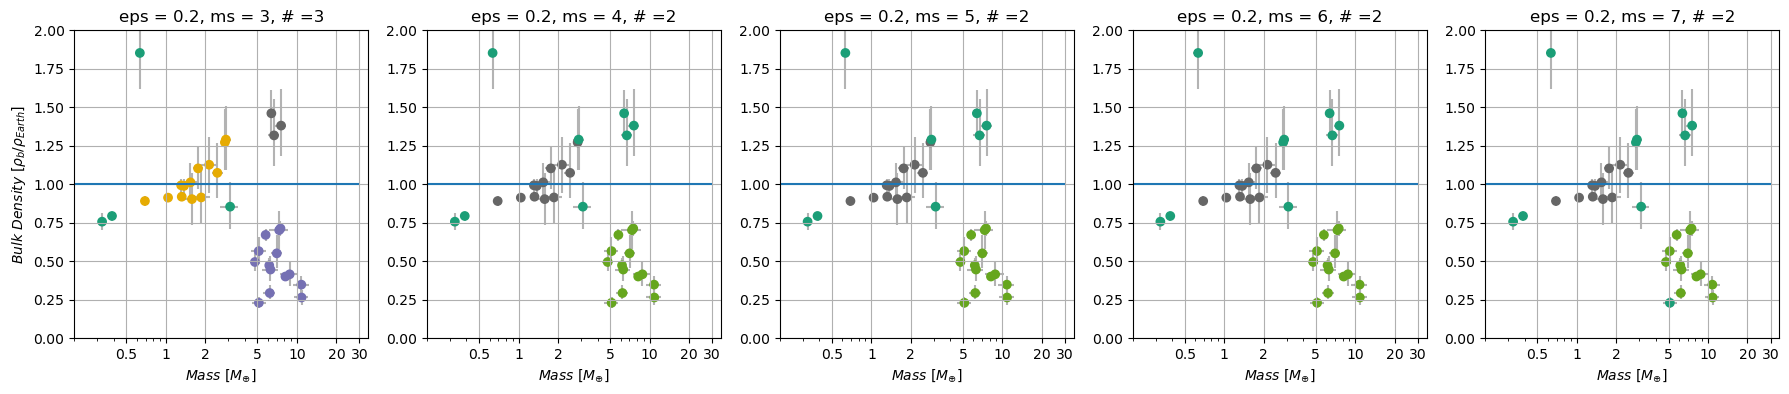

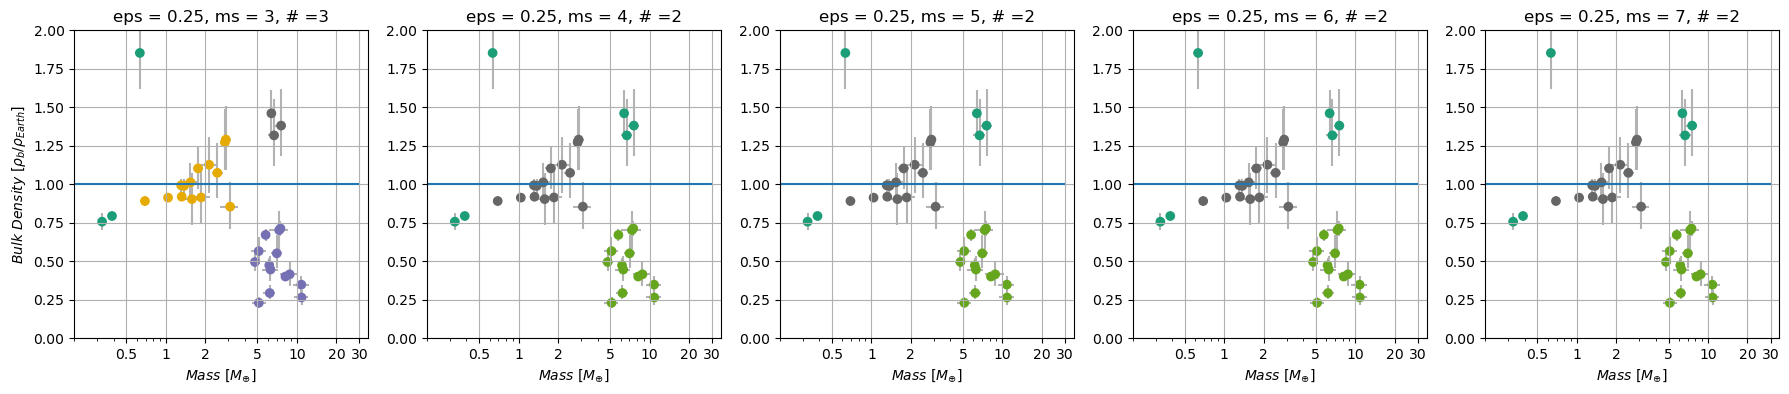

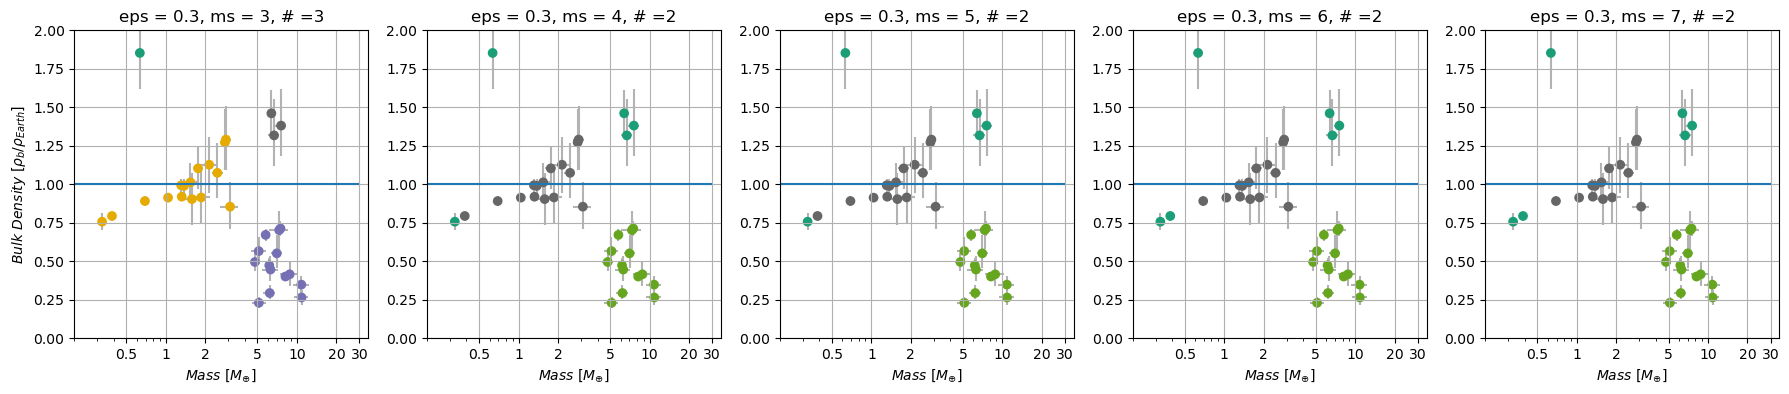

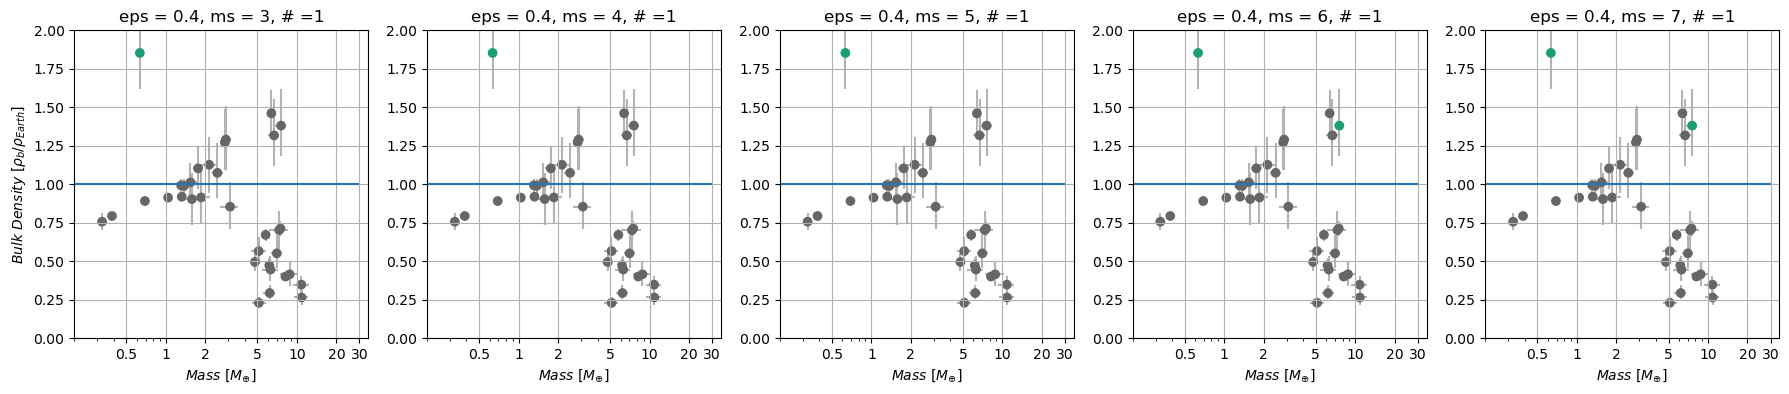

In [14]:
EA_planets = filter_planets(planet_name_EA,0.20,0.20)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets) 
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
min_sample_range = [3,4,5,6,7]
eps = [0.1,0.2,0.25,0.3,0.4]
for j in range(0,len(eps)):
    plt.figure(figsize=(22, 4))  # Adjust the figure size as needed
    for i in range(0,len(min_sample_range)):
        plt.subplot(1, len(min_sample_range), i+1)  # 1 row, 2 columns, second subplot
        X = np.transpose([np.log10(mass),np.divide(density,earth_density)])
        dbscan = DBSCAN(eps = eps[j], min_samples =min_sample_range[i]).fit(X) # fitting the model
        labels = dbscan.labels_ # getting the labels
        plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.7",zorder=-32)
        X = np.transpose([mass,np.divide(density,earth_density)])
        plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "Dark2") # plotting the clusters
        if i == 0:
            plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$")
        plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.xscale("log"); 
        plt.title(str("eps = " + str(eps[j]) +", ms = " + str(min_sample_range[i])+", # ="+str(len(set(labels))-1)))
        plt.ylim(0,2); plt.xlim(0.2,35); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False)
        plt.hlines(1,0,30); plt.grid()

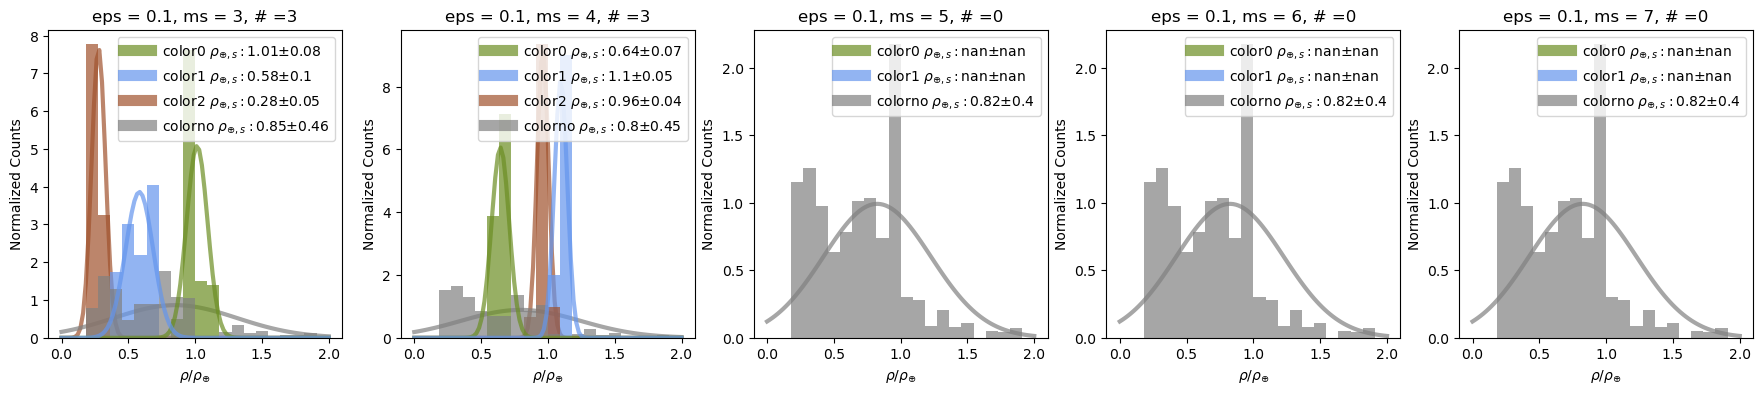

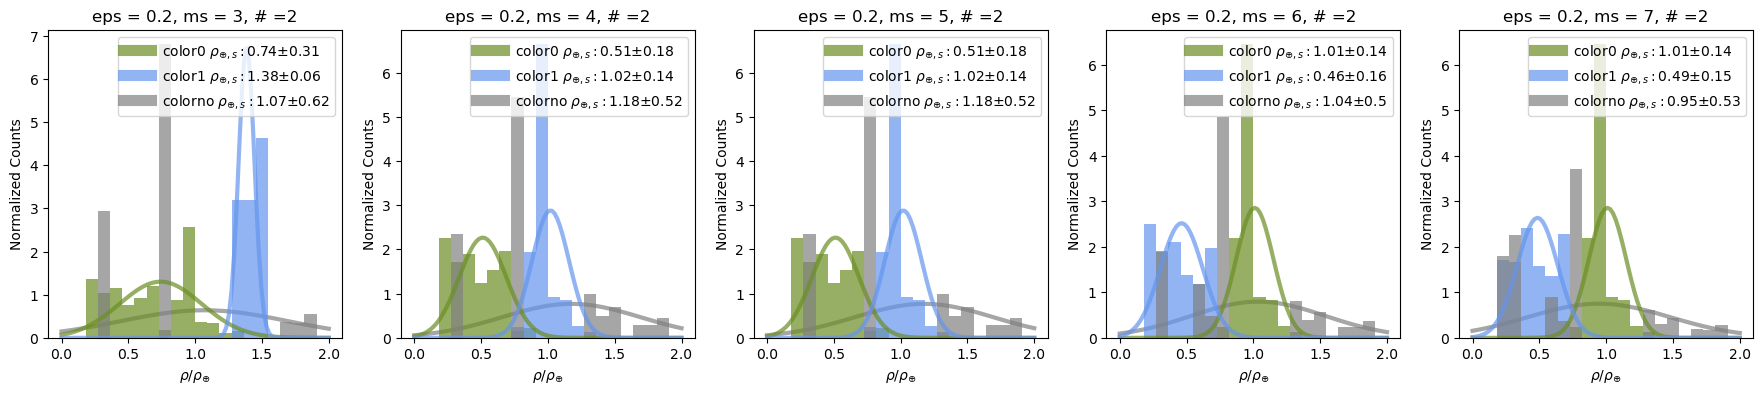

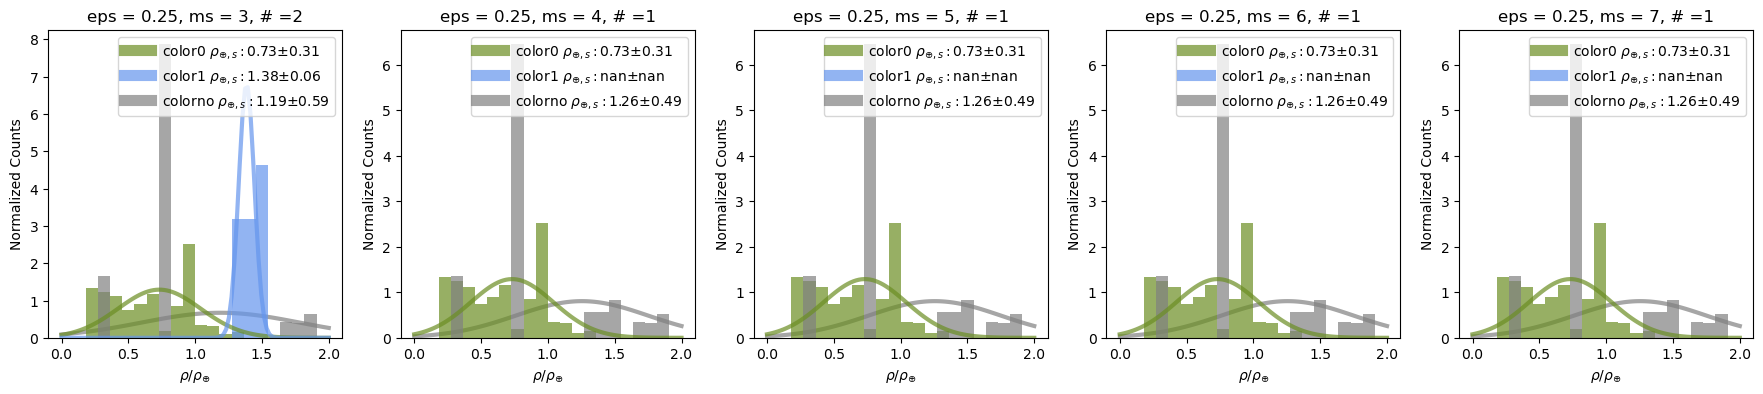

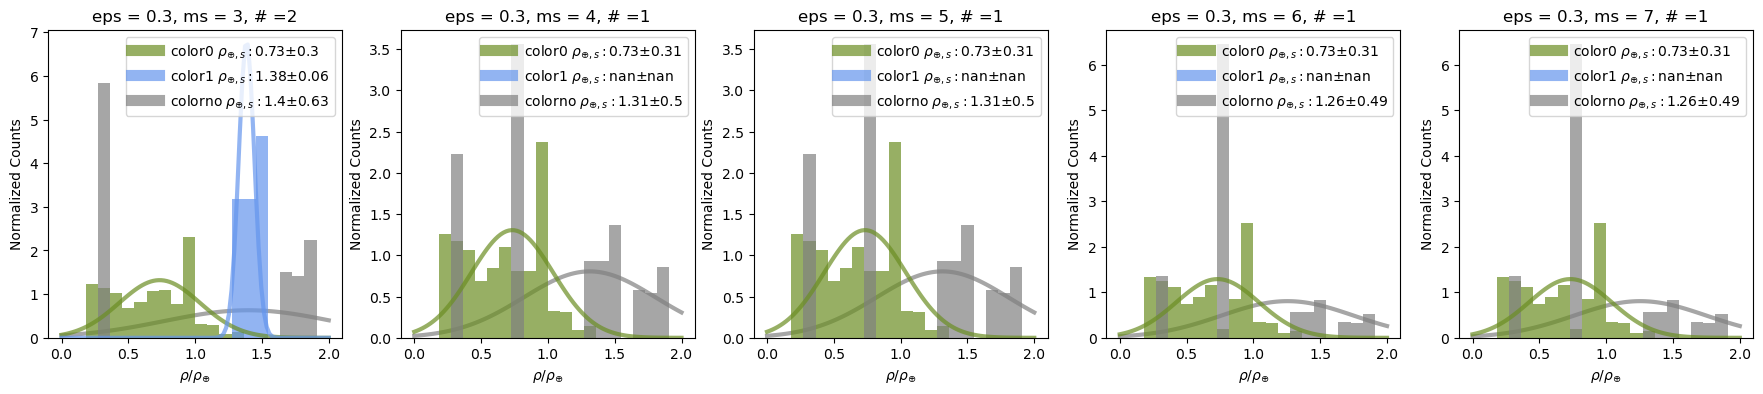

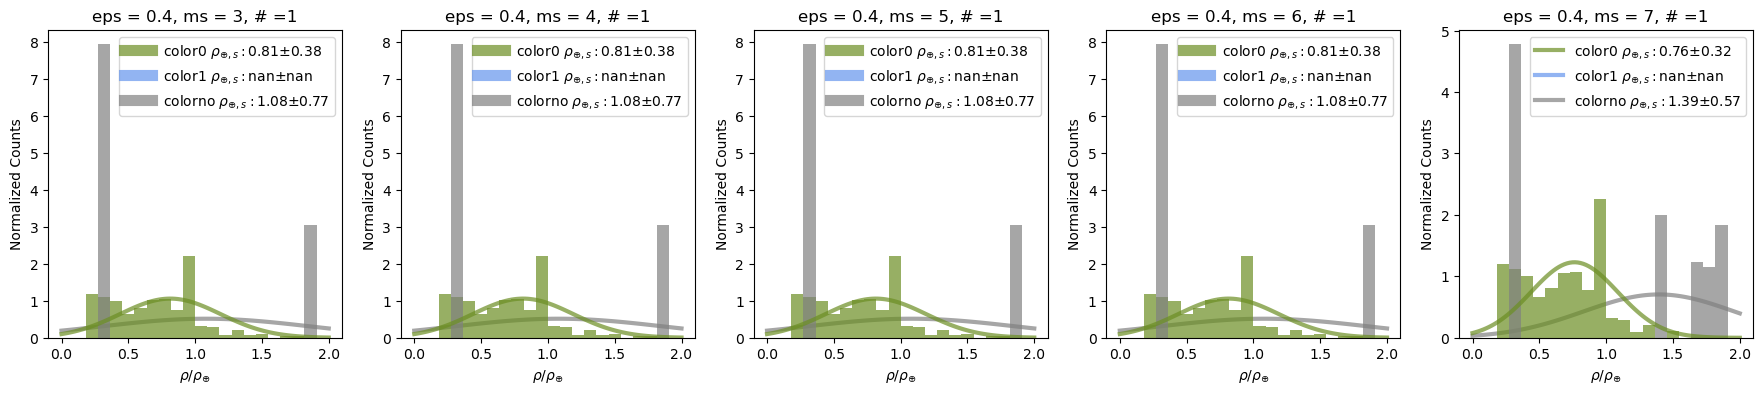

In [16]:
EA_planets = filter_planets(planet_name_EA,0.30,0.30)
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low = make_lists(EA_planets) 
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
min_sample_range = [3,4,5,6,7]
eps = [0.1,0.2,0.25,0.3,0.4]
for j in range(0,len(eps)):
    plt.figure(figsize=(22, 4))  # Adjust the figure size as needed
    for k in range(0,len(min_sample_range)):
        plt.subplot(1, len(min_sample_range), k+1)  # 1 row, 2 columns, second subplot
        weights = 1 / np.divide(density_err,earth_density)
        X = np.transpose([np.log10(mass),np.divide(density,earth_density)])
        dbscan = DBSCAN(eps = eps[j], min_samples =min_sample_range[k]).fit(X) # fitting the model
        labels = dbscan.labels_ # getting the labels
        X = np.transpose([mass,np.divide(density,earth_density)])
        
        color0   = []; color1   = []; color2   = []; colorno  = []
        weight0  = [];weight1   = []; weight2  = []; weightno = []

        for i in range(0,len(labels)):
            if labels[i] == 0:
                color0.append(np.divide(density[i],earth_density))
                weight0.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )
            if labels[i] == 1: 
                color1.append(np.divide(density[i],earth_density))
                weight1.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )
            if labels[i] == 2: 
                color2.append(np.divide(density[i],earth_density))
                weight2.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )
            if labels[i] == -1: 
                colorno.append(np.divide(density[i],earth_density))
                weightno.append( ((1 / np.divide(density_err[1][i],earth_density)) + (1 / np.divide(density_err[0][i],earth_density)) )/ (2) )

        bins  = np.linspace(0, 2, 23)
        pbins = np.linspace(0, 2, 100)
        plt.hist(color0, bins=bins, weights=weight0, alpha=0.7, density = True,color = "olivedrab",linewidth=3)
        plt.hist(color1, bins=bins, weights=weight1, alpha=0.7, density = True,color = "cornflowerblue",linewidth=3)
        plt.hist(color2, bins=bins, weights=weight2, alpha=0.7, density = True,color = "sienna",linewidth=3)
        plt.hist(colorno, bins=bins, weights=weightno, alpha=0.7,density = True,color = "grey",linewidth=3)

        mu, sigma = scipy.stats.norm.fit(color0)
        best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
        plt.plot(pbins, best_fit_line,label ="color0 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "olivedrab",linewidth=3,alpha = 0.7)

        mu, sigma = scipy.stats.norm.fit(color1)
        best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
        plt.plot(pbins, best_fit_line,label ="color1 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,alpha = 0.7)
        
        if len(set(labels)) > 3: 
            mu, sigma = scipy.stats.norm.fit(color2)
            best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
            plt.plot(pbins, best_fit_line,label ="color2 "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3,zorder=-20,alpha = 0.7)

        mu, sigma = scipy.stats.norm.fit(colorno)
        best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
        plt.plot(pbins, best_fit_line,label ="colorno "+"$ρ_{⊕,s}: $"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "grey",linewidth=3,zorder=-20,alpha = 0.7)
        plt.title(str("eps = " + str(eps[j]) +", ms = " + str(min_sample_range[k])+", # ="+str(len(set(labels))-1)))

        for line in leg.get_lines():
            line.set_linewidth(8.0)
        leg = plt.legend()
        plt.xlabel('$ρ / ρ_{⊕}$')
        plt.ylabel('Normalized Counts')